# Project Template (Notebook Version)

©2018 Created by Yiming Peng and Bing Xue

## Train

### Description:
The train.py is to build your CNN model, train the model, and save it for later evaluation(marking)
This is just a simple template, you feel free to change it according to your own style.
However, you must make sure:
1. Your own model is saved to the directory "model" and named as "model.h5"
2. The "test.py" must work properly with your model, this will be used by tutors for marking.
3. If you have added any extra pre-processing steps, please make sure you also implement them in "test.py" so that they can later be applied to test images.



In [1]:
# Import modules
import numpy as np
import tensorflow as tf
import random
from imutils import paths
import pandas as pd
import seaborn as sns

from tensorflow.python.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow import keras
import itertools
import os
import cv2

from train import construct_model, train_model, save_model, load_train_images
from test import load_images, preprocess_data, evaluate

INFO:tensorflow:Using local port 16762
INFO:tensorflow:Using local port 15294
INFO:tensorflow:Using local port 16858
INFO:tensorflow:Using local port 17645
INFO:tensorflow:Using local port 24626
INFO:tensorflow:Using local port 17368
INFO:tensorflow:Using local port 16339
INFO:tensorflow:Using local port 24265
INFO:tensorflow:Using local port 24194
INFO:tensorflow:Using local port 15420
2.4.0-dev20201012


ImportError: cannot import name 'preprocess_data' from 'test' (/Users/keirynhart/Documents/Uni/Comp 309/project/COMP309_2020_Project/Project/test.py)

In [ ]:
# SEED
SEED = 309
np.random.seed(SEED)
random.seed(SEED)
#tf.set_random_seed(SEED)
tf.random.set_seed(SEED)
print(tf.version.VERSION)

# EDA:

In [10]:
#datagen = ImageDataGenerator(validation_split=0.3)
train_path = "/Users/keirynhart/Documents/Uni/Comp 309/project/COMP309_2020_Project/Train_data"

train_batch = tf.keras.preprocessing.image_dataset_from_directory(train_path, subset='training', validation_split = 0.3,
                                          image_size = (300,300), seed = 309, labels='inferred',
                                          batch_size = 20, label_mode = 'categorical', shuffle = True)

val_batch = tf.keras.preprocessing.image_dataset_from_directory(train_path, subset='validation', validation_split = 0.3,
                                        image_size = (300,300), seed = 309, labels='inferred',
                                        batch_size = 20, label_mode='categorical', shuffle = True)


Found 4386 files belonging to 3 classes.
Using 3071 files for training.
Found 4386 files belonging to 3 classes.
Using 1315 files for validation.


TypeError: float() argument must be a string or a number, not 'BatchDataset'

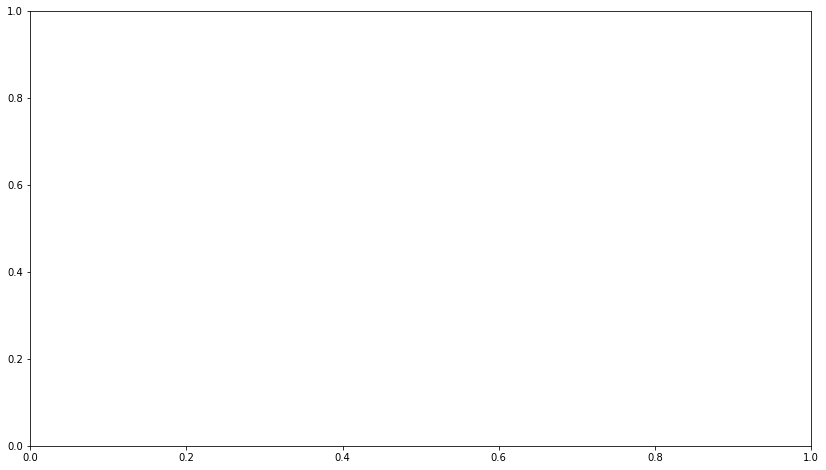

In [108]:
fig, ax = plt.subplots(figsize=(14,8))
sns.distplot(train_batch, kde=False, ax=ax)

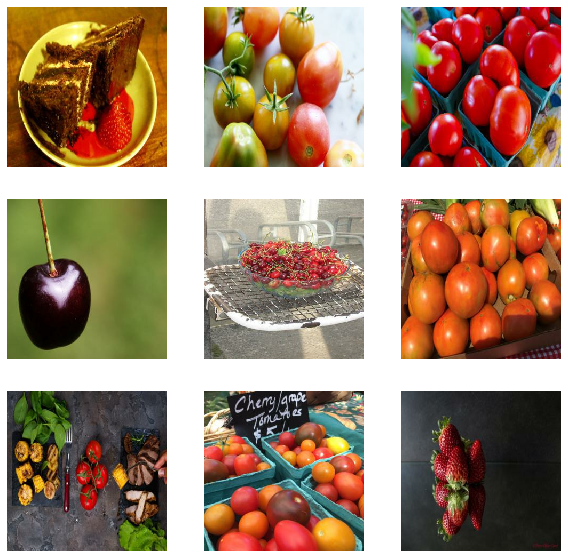

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_batch.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [13]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.4, 0.4), width_factor=(-0.4, 0.4),
                                                           fill_mode = 'wrap')
    ]
)

In [14]:
augmented_train_data = train_batch.map(
  lambda x, y: (data_augmentation(x, training=True), y))

/Users/keirynhart/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


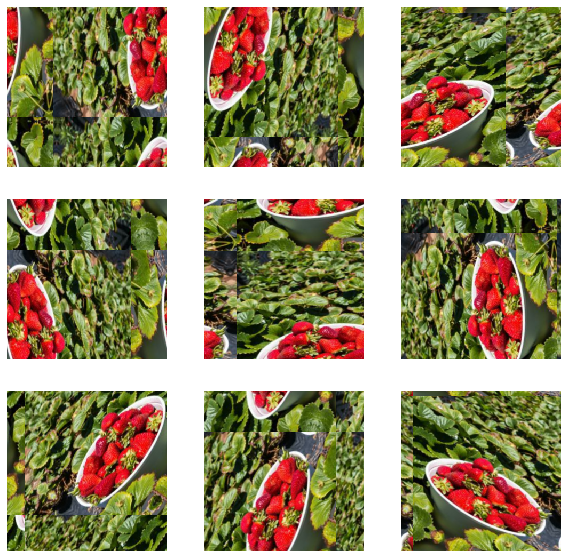

In [15]:
plt.figure(figsize=(10, 10))
for images, _ in train_batch.take(2):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [41]:
model = Sequential()
    model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', input_shape = (300,300,3)))
    model.add(Conv2D(32, kernel_size = (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(64, kernel_size = (3,3)))
    model.add(Conv2D(64, kernel_size = (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    
    model.add(Conv2D(128, kernel_size = (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Flatten())


IndentationError: unexpected indent (<ipython-input-41-c8f59e61adc5>, line 2)

In [68]:
def construct_model():
   # """
   # Construct the CNN model.
   # ***
    #    Please add your model implementation here, and don't forget compile the model
    #    E.g., model.compile(loss='categorical_crossentropy',
      #                      optimizer='sgd',
       #                     metrics=['accuracy'])
    #    NOTE, You must include 'accuracy' in as one of your metrics, which will be used for marking later.
   # ***
   # :return: model: the initial CNN model
   # """


    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', input_shape = (300,300,3)))
    model.add(Conv2D(32, kernel_size = (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(64, kernel_size = (3,3)))
    model.add(Conv2D(64, kernel_size = (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    
    model.add(Conv2D(128, kernel_size = (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Flatten())
    
    model.add(Dense(units = 64))
    model.add(Activation('relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(units = 128))
    model.add(Dense(units = 3))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate = 0.01),
              metrics=['accuracy'])
    print(model.summary())
    return model

In [69]:
construct_model()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 300, 300, 32)      896       
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 298, 298, 32)      9248      
_________________________________________________________________
activation_45 (Activation)   (None, 298, 298, 32)      0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 147, 147, 64)      18496     
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 145, 145, 64)      36928     
_________________________________________________________________
activation_46 (Activation)   (None, 145, 145, 64)    

In [75]:
def train_model(model):
    """
    Train the CNN model
    ***
        Please add your training implementation here, including pre-processing and training
    ***
    :param model: the initial CNN model
    :return:model:   the trained CNN model
    """
    # Add your code here

    file_path = '/Users/keirynhart/Documents/Uni/Comp 309/project/COMP309_2020_Project/Checkpoint'
    check = ModelCheckpoint(filepath = file_path, save_freq = 5,
                       save_best_only = True, verbose = 1)
    
    model_fit = model.fit(augmented_train_data, validation_data = val_batch,
                          epochs = 15, callbacks = [check], verbose = 1)
    return model

In [76]:
def save_model(model):
    """
    Save the keras model for later evaluation
    :param model: the trained CNN model
    :return:
    """
    # ***
    #   Please remove the comment to enable model save.
    #   However, it will overwrite the baseline model we provided.
    # ***
    model.save("model4/model.h5")
    print("Model Saved Successfully.")

## Run your train
Identical to the main in train.py of the template

In [78]:
#model = construct_model()
#model = train_model(model)
save_model(model)

Model Saved Successfully.


## Test

### Description:
The test.py is to evaluate your model on the test images.

***IMPORTANT***

After you test here with the notebook, you have to make the test.py work properly. Your final submission should include the test.py.

In [79]:
# Import modules for test
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.preprocessing.image import img_to_array
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
import cv2
import os

# Import related functions from test.py


In [80]:
# This is just like the main in test.py, but here, you need to specify your test images directory.

# Test folder ""
test_path = '/Users/keirynhart/Documents/Uni/Comp 309/project/COMP309_2020_Project/test'

# Image size, please define according to your settings when training your model.
image_size = (300, 300)

# Load images
#images, labels = load_images(test_data_dir, image_size)
test_images = tf.keras.preprocessing.image_dataset_from_directory(test_path,
                                        image_size = image_size, seed = 309, labels='inferred',
                                        batch_size = 20, label_mode='categorical', shuffle = False)




# Convert images to numpy arrays (images are normalized with constant 255.0), and binarize categorical labels
#X_test, y_test = convert_img_to_array(images, labels)
                                                                                                                       
                                                                                                                          
# Preprocess data.
# ***If you have any preprocess, please re-implement the function "preprocess_data"; otherwise, you can skip this***


#X_test = np.random.rand(15, 64)
model = load_model('model3/model.h5')
predictions = model.predict(x = test_images, verbose = 1)
np.round(predictions)

# Evaluation, please make sure that your training model uses "accuracy" as metrics, i.e., metrics=['accuracy']
#loss, accuracy = evaluate(X_test, Y_test)
#print("loss={}, accuracy={}".format(loss, accuracy))

Found 15 files belonging to 3 classes.
1/1 [==============================] - 1s 1s/step


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [81]:
predictions

array([[9.99857903e-01, 3.36116682e-05, 1.08444045e-04],
       [9.95801270e-01, 2.17343820e-03, 2.02528480e-03],
       [9.97647345e-01, 9.40343074e-04, 1.41226500e-03],
       [4.20115322e-01, 4.90828186e-01, 8.90565068e-02],
       [9.33121979e-01, 6.28297925e-02, 4.04826272e-03],
       [2.81123847e-01, 5.49212992e-01, 1.69663221e-01],
       [3.22167099e-01, 4.23630774e-01, 2.54202068e-01],
       [1.20741809e-02, 9.86722350e-01, 1.20360521e-03],
       [1.26587246e-02, 9.86748576e-01, 5.92682627e-04],
       [1.91840589e-01, 7.47874737e-01, 6.02847226e-02],
       [1.25243515e-01, 5.49932659e-01, 3.24823856e-01],
       [1.46259964e-01, 2.46812522e-01, 6.06927514e-01],
       [2.33421460e-01, 4.99337524e-01, 2.67240971e-01],
       [4.96213704e-01, 3.32982898e-01, 1.70803353e-01],
       [2.40533575e-01, 5.63503504e-01, 1.95962965e-01]], dtype=float32)

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in test_images.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [82]:
print(model.metrics_names)
model.evaluate(test_images, verbose = 1)

['loss', 'accuracy']
1/1 [==============================] - 1s 1s/step - loss: 0.6039 - accuracy: 0.6667


[0.6039355993270874, 0.6666666865348816]

In [88]:
loss, accuracy = model.evaluate(test_images, verbose = 1)
loss

1/1 [==============================] - 1s 897ms/step - loss: 0.6039 - accuracy: 0.6667


0.6039355993270874

In [102]:
df = {'Accuracy':  [np.round(accuracy, decimals= 4), '0.3301'],
      'Loss':  [np.round(loss, decimals= 4), '1.0991']}

In [103]:
df = pd.DataFrame(df, columns = ['Accuracy','Loss'])

In [104]:
df

,Accuracy,Loss
0,0.6667,0.6039
1,0.3301,1.0991
